In [1]:
#import tensorflow

import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape",x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)


In [9]:
# Build the model
model = tf.keras.models.Sequential([
   tf.keras.layers.Flatten(input_shape = (28,28)),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(10, activation='softmax')
]);

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model

r= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4820 - accuracy: 0.8581 - val_loss: 0.1405 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1522 - accuracy: 0.9560 - val_loss: 0.0991 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9672 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9732 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0723 - val_accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9802 - val_loss: 0.0689 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9829 - val_loss: 0.0661 - val_accuracy:

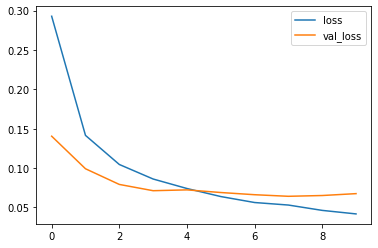

In [12]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

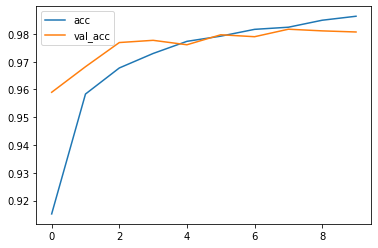

In [13]:
#Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [14]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9807
[0.06748316437005997, 0.9807000160217285]


[[ 969    0    2    0    2    0    4    2    1    0]
 [   0 1125    3    2    0    0    2    0    3    0]
 [   2    0 1012    0    4    0    1    8    4    1]
 [   0    0    8  983    1    7    0    7    2    2]
 [   1    0    3    0  964    0    4    2    0    8]
 [   2    0    1    2    1  881    1    0    3    1]
 [   5    2    0    1    2    5  943    0    0    0]
 [   2    2    7    2    0    0    0 1011    1    3]
 [   7    0    3    3    5    4    2    6  941    3]
 [   2    2    0    7    8    1    1    8    2  978]]


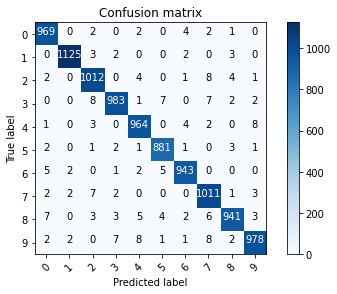

In [17]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools 

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
      if (normalize):
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print('Confusion metrix, without normalization')
      else:
         print(cm)

      plt.imshow(cm,interpolation='nearest',cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks,classes,rotation=45)
      plt.yticks(tick_marks,classes)

      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else "black")
      
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))
   

Text(0.5, 1.0, 'True label 2 Predicated 7')

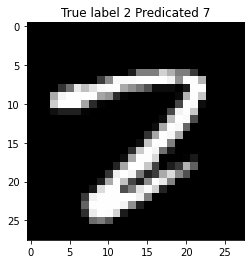

In [27]:
#show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label %s Predicated %s' % (y_test[i],p_test[i]))